In [9]:
#File Loading

import pandas as pd


try:
    train_df=pd.read_csv("../data/train_data.csv")
    valid_df=pd.read_csv("../data/valid_data.csv")
    print("Datasets loaded successfully")
except FileNotFoundError:
    print("CSV files not found. Please check the file path.")

print("\nTraining Data info:")
print(train_df.info())
print("\nValidation Data Info: ")
print(valid_df.info())

print("\n Missing values in training data: ")
print(train_df.isnull().sum())
print("\n Missing values in validation data: ")
print(valid_df.isnull().sum())

print("\n Sample Training Data:")
print(train_df.head())
print("\n Sample Validation data: ")
print(valid_df.head())

#Data Cleaning
from scripts.data_cleaning import clean_text

train_df["clean_text"]=train_df["text"].astype(str).apply(clean_text)
valid_df["clean_text"]=valid_df["text"].astype(str).apply(clean_text)

print("\nSample Before/After Cleaning: ")
print(train_df[["text", "clean_text"]].head())

Datasets loaded successfully

Training Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16990 non-null  object
 1   label   16990 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 265.6+ KB
None

Validation Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4117 non-null   object
 1   label   4117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.5+ KB
None

 Missing values in training data: 
text     0
label    0
dtype: int64

 Missing values in validation data: 
text     0
label    0
dtype: int64

 Sample Training Data:
                                                text  label
0  Here are Thursday's biggest analyst calls: App...      0
1  Buy Las Vegas Sands 

h:\twitter analysis\scripts\visualization.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col,


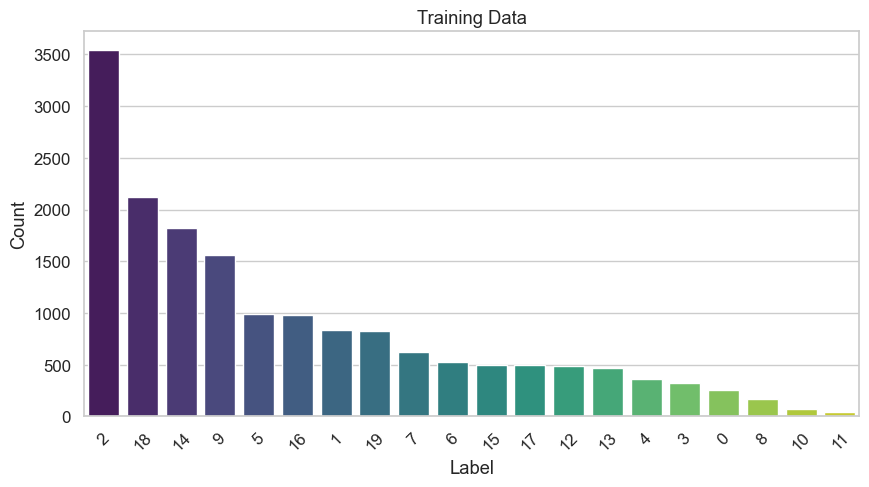

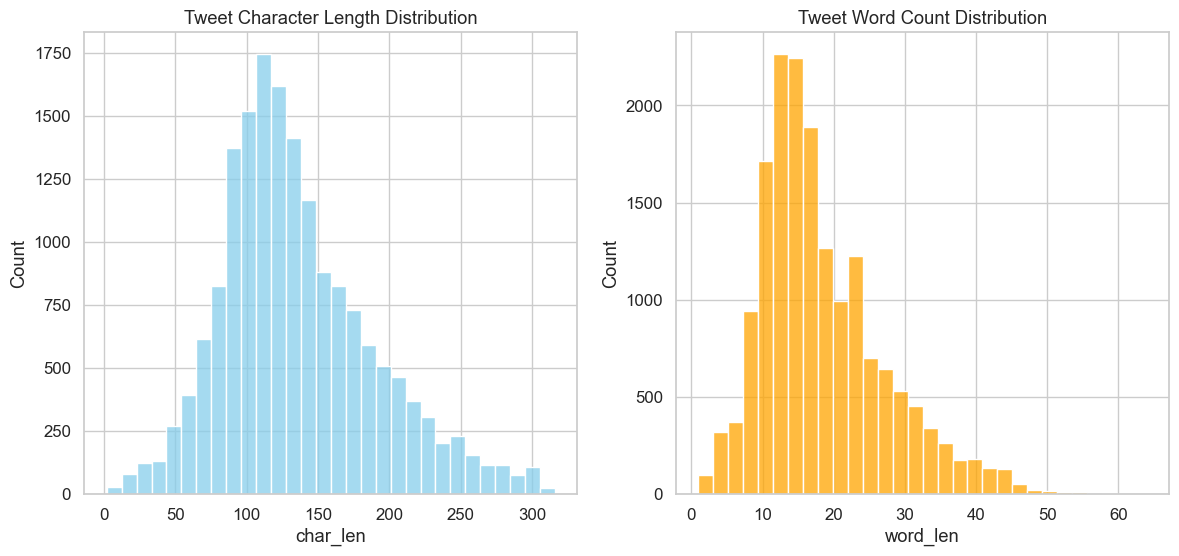

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\3581570344.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="word_len", data=train_df, palette="Set2")


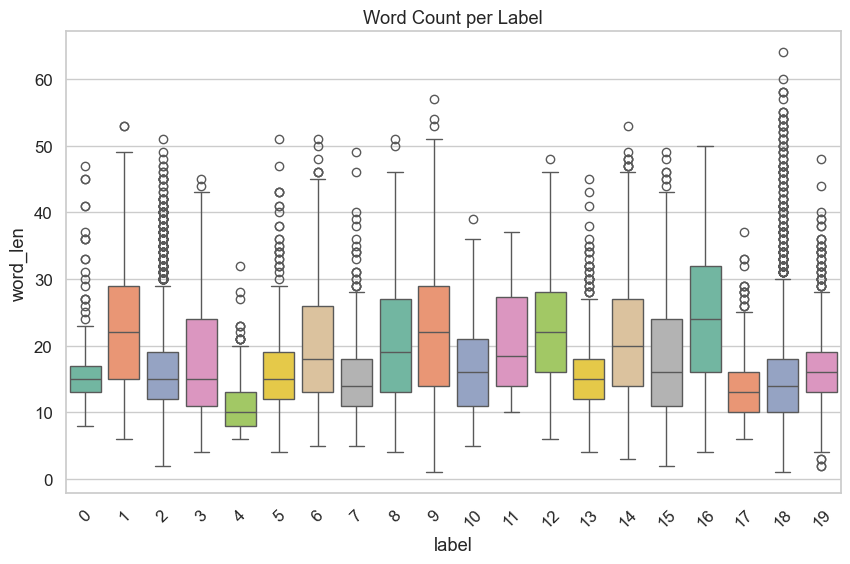

WordCloud for all labels combined (cleaned Text)


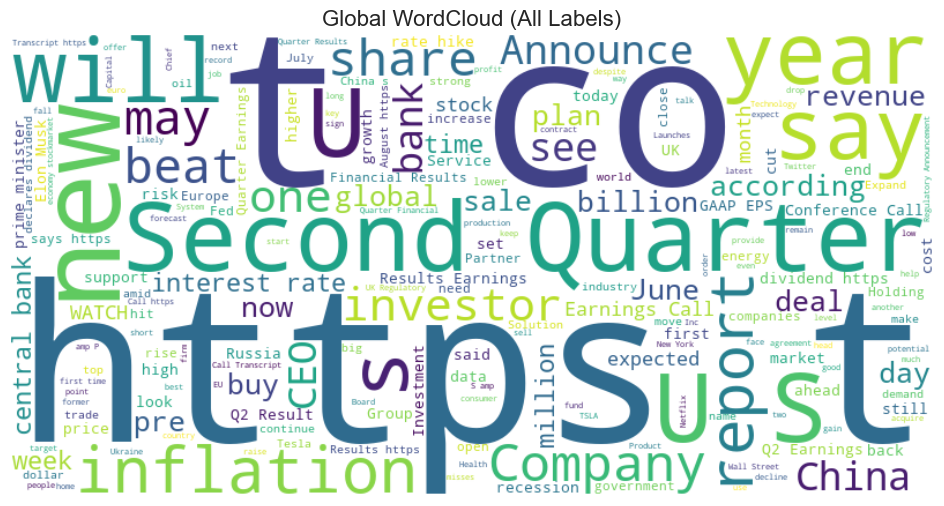

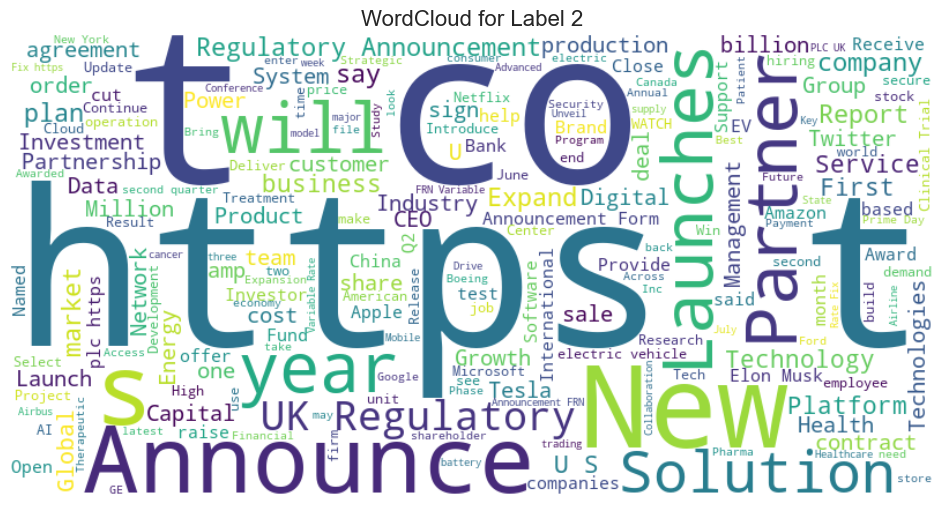

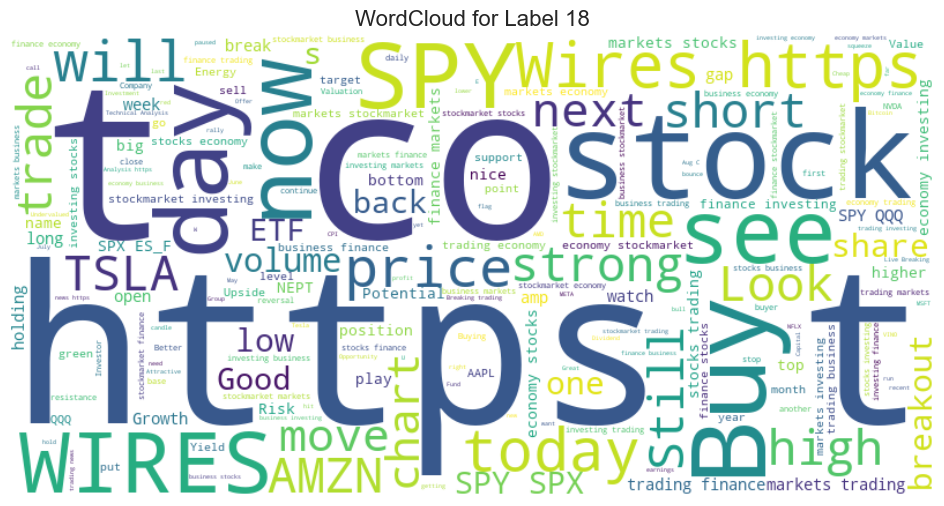

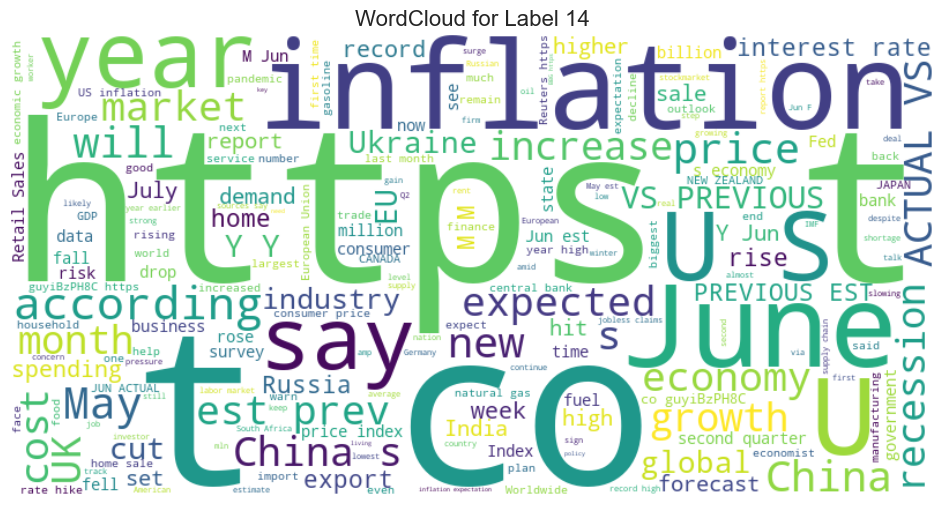

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\3581570344.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_word_len.index, y=avg_word_len.values, palette="magma")


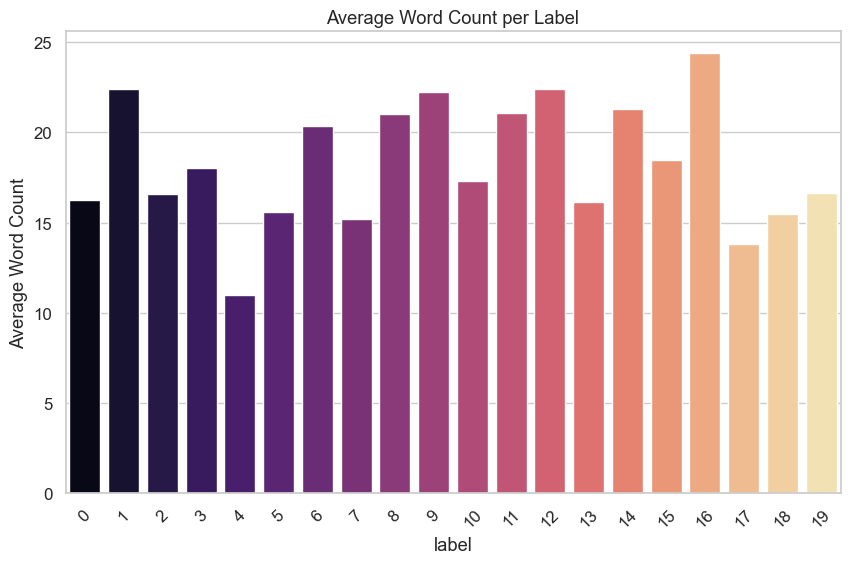

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\3581570344.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="char_len", data=train_df, palette="coolwarm", cut=0)


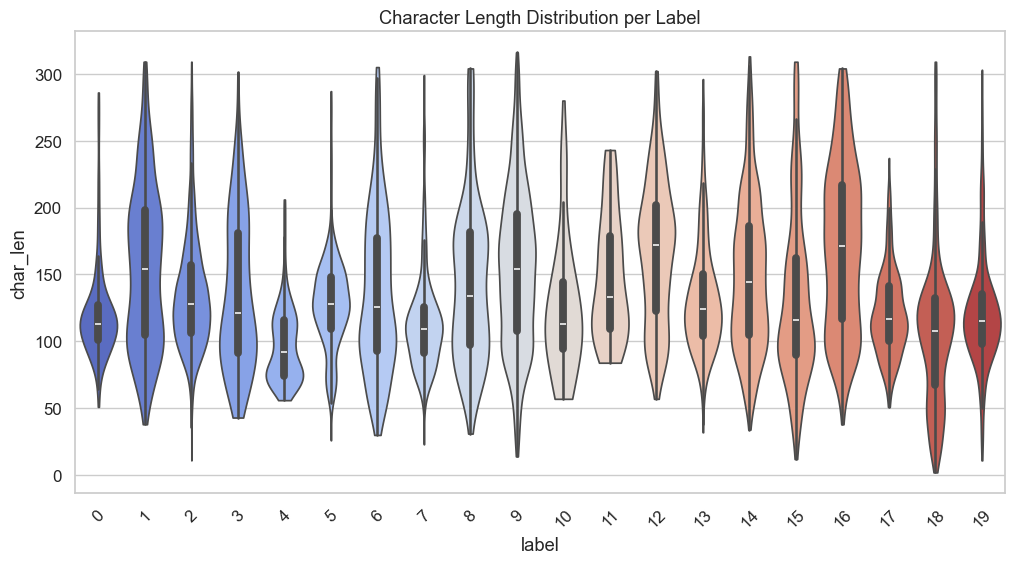

In [9]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


import sys,os
sys.path.append(os.path.abspath(".."))
from scripts.visualization import(
    plot_label_distribution,
    plot_wordcloud,
    plot_length_distribution,
    plot_confusion_matrix
)

# Label Distribution
plot_label_distribution(train_df, label_col="label",title="Training Data")

# Tweet length Distribution(raw vs clean)
plot_length_distribution(train_df,text_col="text")
'''train_df["char_len"]=train_df["text"].apply(len)
train_df["word_len"]=train_df["text"].apply(lambda x: len(x.split()))
train_df["char_len_clean"]=train_df["clean_text"].apply(len)
train_df["word_len_clean"]=train_df["clean_text"].apply(lambda x: len(x.split()))

fig,ax=plt.subplots(2,2, figsize=(14,10))

sns.histplot(train_df["char_len"], bins=30, ax=ax[0,0], color="skyblue")
ax[0,0].set_title("Tweet Character Length Distribution (Raw)")

sns.histplot(train_df["word_len"], bins=30, ax=ax[0,1], color="orange")
ax[0,1].set_title("Tweet Word Count Distribution (raw)")

sns.histplot(train_df["char_len_clean"], bins=30, ax=ax[1,0], color="green")
ax[1,0].set_title("Tweet Character Length Distribution (Cleaned)")

sns.histplot(train_df["word_len_clean"], bins=30, ax=ax[1,1],color="purple")
ax[1,1].set_title("Tweet Word Count Distribution (cleaned)")

plt.tight_layout()
plt.show()'''

# Boxplot for wodd length per label
plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="word_len", data=train_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Word Count per Label")
plt.show()

#Global wordcloud
print("WordCloud for all labels combined (cleaned Text)")
plot_wordcloud(train_df["text"], title="Global WordCloud (All Labels)")

# WordCloud per label
top_labels=train_df["label"].value_counts().head(3).index
for lbl in top_labels:
    subset=train_df[train_df["label"]==lbl]["text"]
    plot_wordcloud(subset, title=f"WordCloud for Label {lbl}")
'''for lbl in train_df["label"].unique():
    text=" ".join(train_df[train_df["label"]==lbl]["clean_text"].astype(str).values)
    wc=WordCloud(width=800,height=400, background_color="white").generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Label {lbl}")
    plt.show()'''

#5. Average Word Lwngth per Label 
avg_word_len=train_df.groupby("label")["word_len"].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_word_len.index, y=avg_word_len.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Average Word Count per Label")
plt.ylabel("Average Word Count")
plt.show()

#6. Character Length Distribution per Label
plt.figure(figsize=(12,6))
sns.violinplot(x="label", y="char_len", data=train_df, palette="coolwarm", cut=0)
plt.xticks(rotation=45)
plt.title("Character Length Distribution per Label")
plt.show()

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="word_len_clean", data=train_df, palette="Set2")


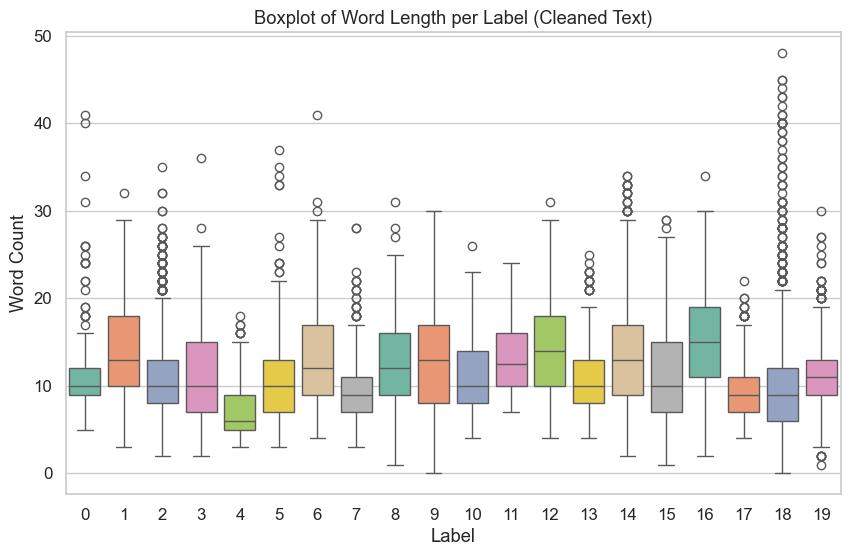

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='mako')


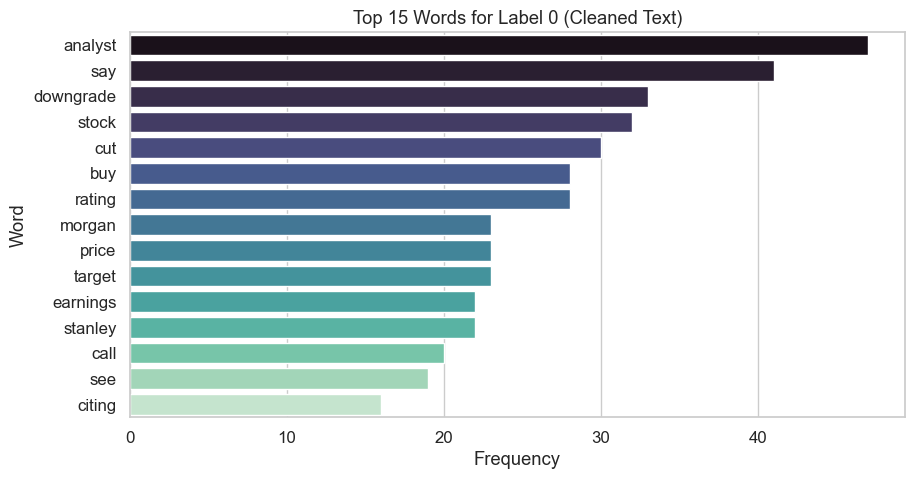

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='mako')


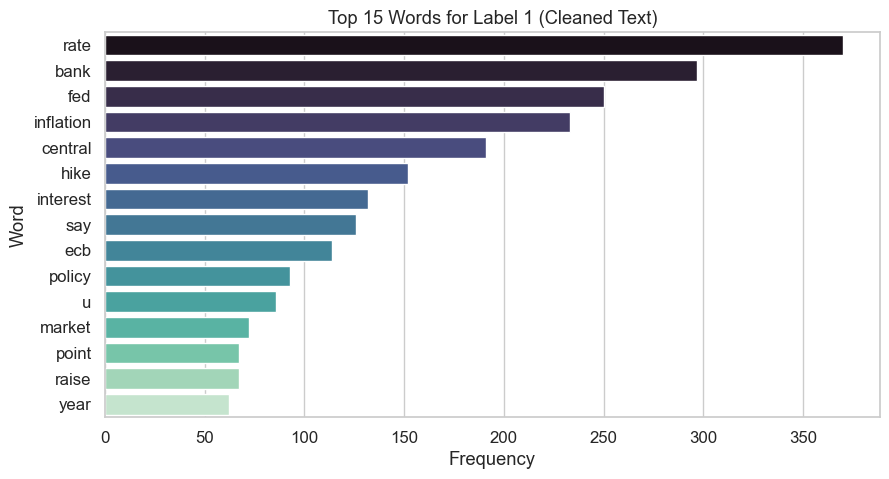

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='mako')


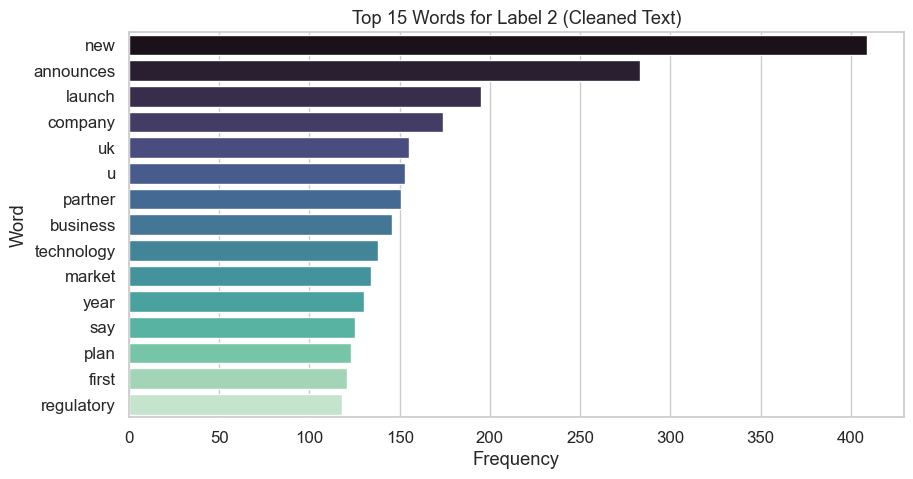

WordCloud for all labels combined (cleaned Text)


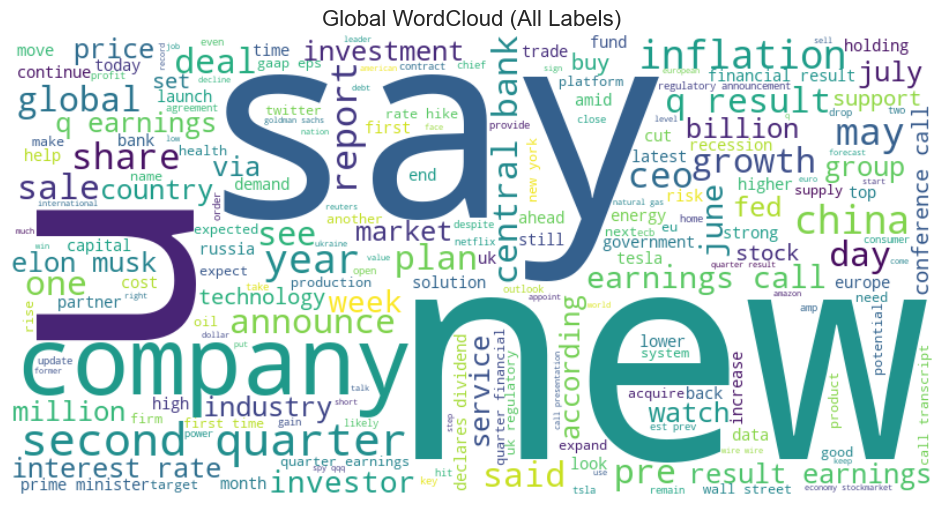

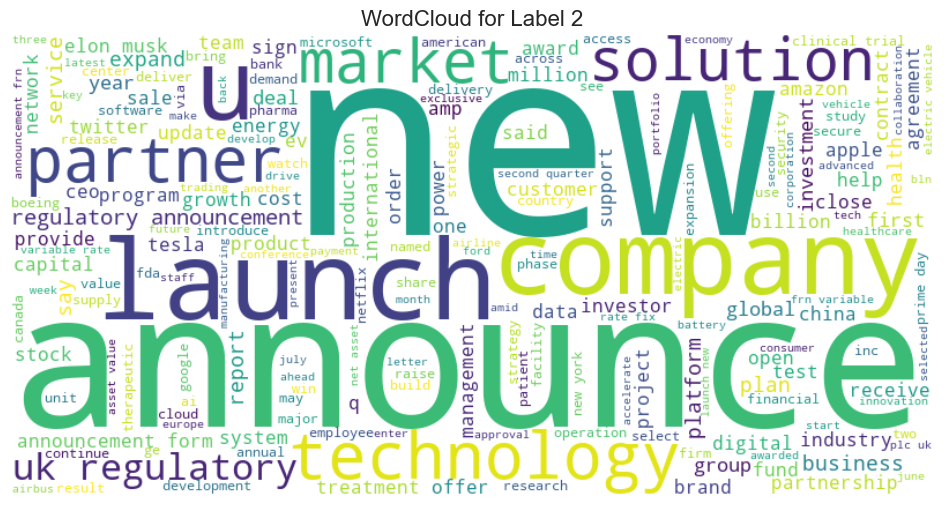

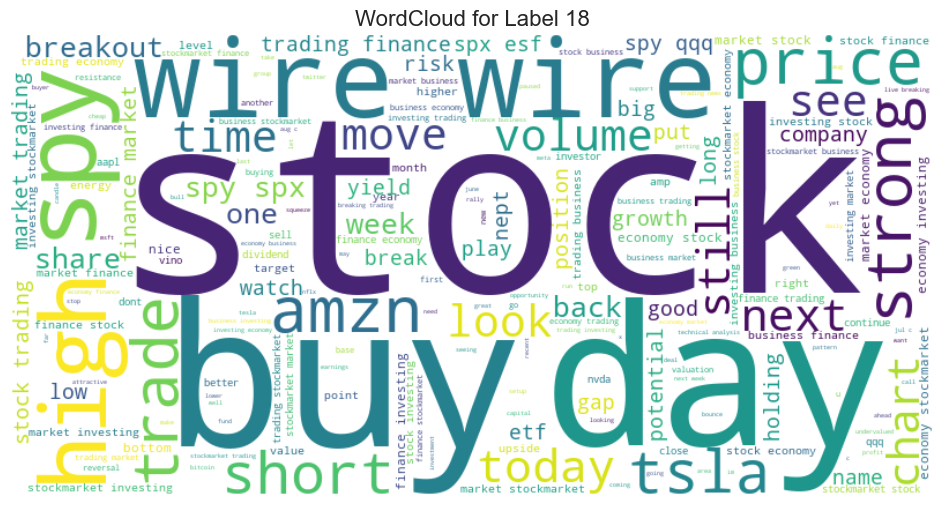

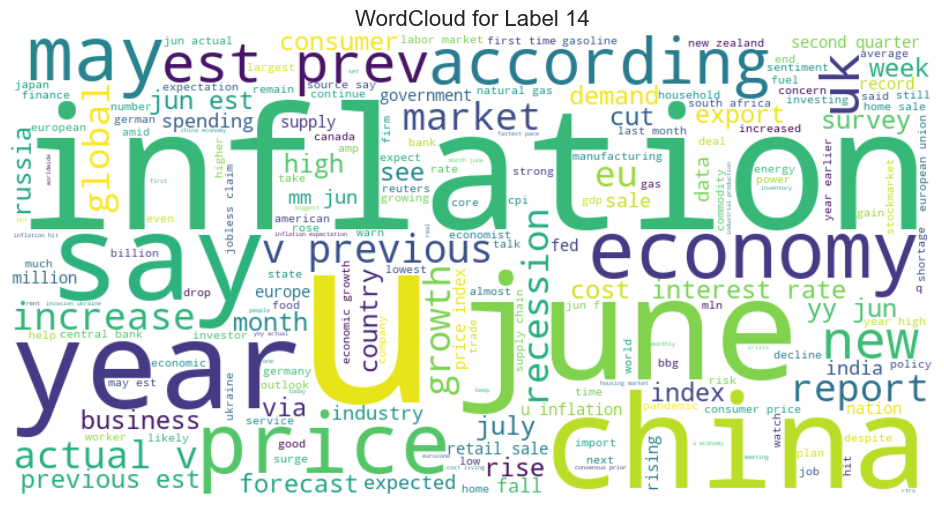

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


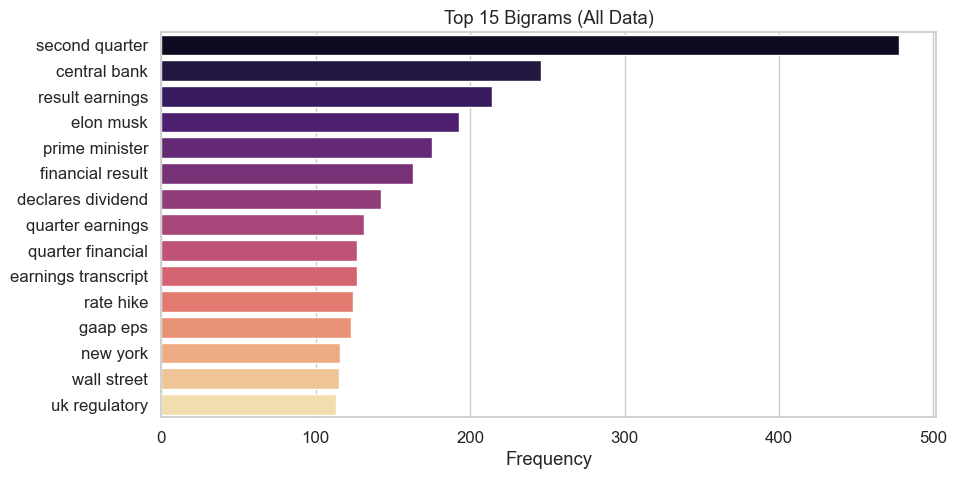

C:\Users\Sameer Tripathi\AppData\Local\Temp\ipykernel_30880\2882662720.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


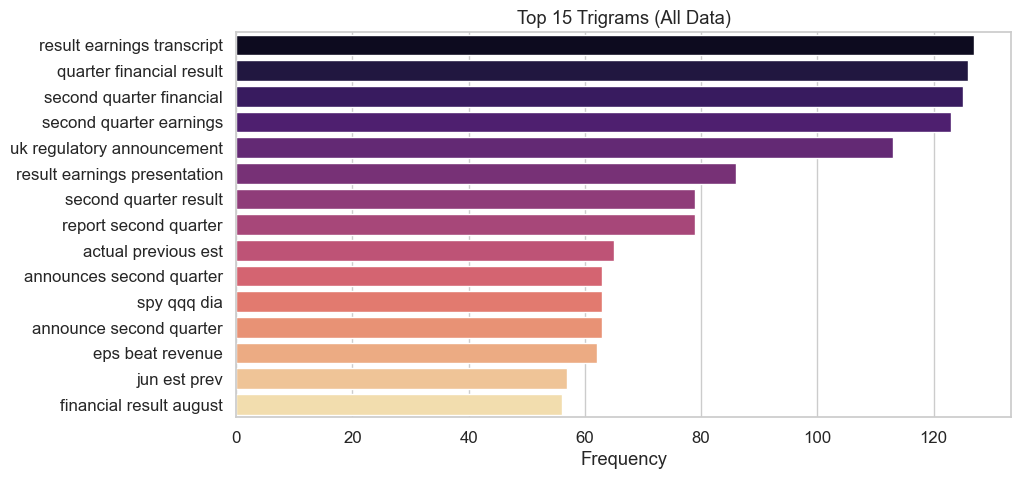

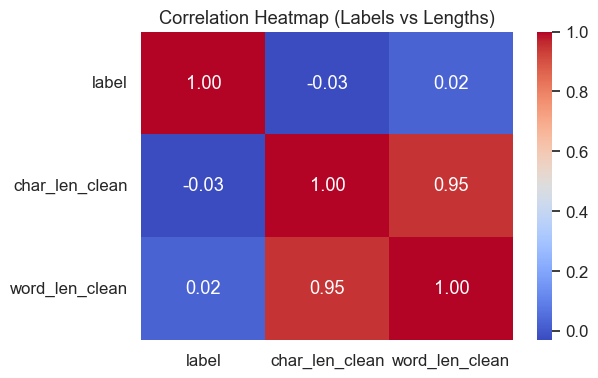

In [12]:
#Post data cleaning EDA

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import wordcloud
import re

# Boxplot for word length per label 
train_df["char_len_clean"]=train_df["clean_text"].apply(len)
train_df["word_len_clean"]=train_df["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="word_len_clean", data=train_df, palette="Set2")
plt.title("Boxplot of Word Length per Label (Cleaned Text)")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.show()

# Most common words per label
def plot_top_words(df,label,n=15):
    text=" ".join(df[df["label"]==label]["clean_text"].values)
    words=text.split()
    common_words=Counter(words).most_common(n)
    words, counts=zip(*common_words)
    

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette='mako')
    plt.title(f"Top {n} Words for Label {label} (Cleaned Text)")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

for lbl in sorted(train_df["label"].unique())[:3]:
    plot_top_words(train_df,lbl,n=15)

#Global wordcloud
print("WordCloud for all labels combined (cleaned Text)")
plot_wordcloud(train_df["clean_text"], title="Global WordCloud (All Labels)")

# WordCloud per label
top_labels=train_df["label"].value_counts().head(3).index
for lbl in top_labels:
    subset=train_df[train_df["label"]==lbl]["clean_text"]
    plot_wordcloud(subset, title=f"WordCloud for Label {lbl}")

# N-gram Analysis(bigrams)
from sklearn.feature_extraction.text import  CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,2), n=15, title="Top N-grams"):
    vec=CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
   
    words,counts=zip(*words_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette="magma")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

get_top_ngrams(train_df["clean_text"], ngram_range=(2,2), n=15, title="Top 15 Bigrams (All Data)")
get_top_ngrams(train_df["clean_text"], ngram_range=(3,3),n=15,title="Top 15 Trigrams (All Data)")


#Correlation Heatmap of Labels vs Lengths
plt.figure(figsize=(6,4))
sns.heatmap(
    train_df[["label", "char_len_clean", "word_len_clean"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap (Labels vs Lengths)")
plt.show()